# <center><font color='green'>Capstone Project 1
Objective: Predict Credit Card Approval using Machine Learning Models.
    
Description:
    A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' credit worthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

Section 1: Questions to Answer

What questions do you want to answer?


Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
    - In the current era, most of the people using credit cards. But when it comes to paying the credit card bills, nearly half of the people does not pay the bills properly. So that, banks incur a loss in their annual revenue. It is important for a bank to provide the credit card to genuine customers. It is hard to identify genuine customers manually. Hence, with the advancements in the technologies, we can predict the credit card approvals using Machine Learning Models.

How is it going to impact the banking sector?

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
    - With the help of machine learning models, the predication of credit card approval became easier. It helps banks to identify the genuine customers. Hence, the banks can be benefitted in terms of money and it also improve bank-customer relationship.

Section 2: Initial Hypothesis (or hypotheses)

Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track. 

If DA track please aim to identify patterns in the data and important features that may impact a ML model.

If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there is any assumption and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

    
Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import missingno as msno

from sklearn.experimental import enable_iterative_imputer         
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split # importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler #Transforming the data
import sklearn.metrics as met

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df1=pd.read_csv('credit_card.csv')

In [3]:
df2=pd.read_csv('credit_card_label.csv')

In [4]:
df1.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [5]:
df2.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [6]:
df1.shape

(1548, 18)

In [7]:
df2.shape

(1548, 2)

In [8]:
df1=df1.merge(df2,on='Ind_ID') # merging feature table with target table

In [9]:
df1.set_index('Ind_ID',inplace=True) #setting Ind_id as index column

In [10]:
df1.head() #checking the first five records of the dataframe

GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
Ind_ID                                                            
5008827      M         Y             Y         0       180000.0   
5009744      F         Y             N         0       315000.0   
5009746      F         Y             N         0       315000.0   
5009749      F         Y             N         0            NaN   
5009752      F         Y             N         0       315000.0   

                  Type_Income         EDUCATION Marital_status  \
Ind_ID                                                           
5008827             Pensioner  Higher education        Married   
5009744  Commercial associate  Higher education        Married   
5009746  Commercial associate  Higher education        Married   
5009749  Commercial associate  Higher education        Married   
5009752  Commercial associate  Higher education        Married   

              Housing_type  Birthday_count  Employed_days  Mobile_phone  \
Ind_ID                                                                    
5008827  House / apartment        -18772.0         365243             1   
5009744  House / apartment        -13557.0           -586             1   
5009746  House / apartment             NaN           -586             1   
5009749  House / apartment        -13557.0           -586             1   
5009752  House / apartment        -13557.0           -586             1   

         Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
Ind_ID                                                                       
5008827           0      0         0             NaN               2      1  
5009744           1      1         0             NaN               2      1  
5009746           1      1         0             NaN               2      1  
5009749           1      1         0             NaN               2      1  
5009752           1      1         0             NaN               2      1

In [11]:
df1.info() #checking the overall outline of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 5008827 to 5053790
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1525 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Birthday_count   1526 non-null   float64
 10  Employed_days    1548 non-null   int64  
 11  Mobile_phone     1548 non-null   int64  
 12  Work_Phone       1548 non-null   int64  
 13  Phone            1548 non-null   int64  
 14  EMAIL_ID         1548 non-null   int64  
 15  Type_Occupation  1060 non-null   object 
 16  Family_Members   1548 non-null   int64  
 17  label

Insights:

   - Dataset has 1548 rows and 18 columns.
   - It has 8 categorical columns (obj) and 10 numerical columns (int,float)
   - Few columns has null values.

In [12]:
df1.describe() #checking aggregated data about the features

CHILDREN  Annual_income  Birthday_count  Employed_days  \
count  1548.000000   1.525000e+03     1526.000000    1548.000000   
mean      0.412791   1.913993e+05   -16040.342071   59364.689922   
std       0.776691   1.132530e+05     4229.503202  137808.062701   
min       0.000000   3.375000e+04   -24946.000000  -14887.000000   
25%       0.000000   1.215000e+05   -19553.000000   -3174.500000   
50%       0.000000   1.665000e+05   -15661.500000   -1565.000000   
75%       1.000000   2.250000e+05   -12417.000000    -431.750000   
max      14.000000   1.575000e+06    -7705.000000  365243.000000   

       Mobile_phone   Work_Phone        Phone     EMAIL_ID  Family_Members  \
count        1548.0  1548.000000  1548.000000  1548.000000     1548.000000   
mean            1.0     0.208010     0.309432     0.092377        2.161499   
std             0.0     0.406015     0.462409     0.289651        0.947772   
min             1.0     0.000000     0.000000     0.000000        1.000000   
25%             1.0     0.000000     0.000000     0.000000        2.000000   
50%             1.0     0.000000     0.000000     0.000000        2.000000   
75%             1.0     0.000000     1.000000     0.000000        3.000000   
max             1.0     1.000000     1.000000     1.000000       15.000000   

             label  
count  1548.000000  
mean      0.113049  
std       0.316755  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Insights:
    
    - Average annual income of a person is 1,91,399.Minimum and maxmium annual income are 33,750 and 15,75,000 respectively.
    - Average age of a person is 44 years.
    - Based on the summary, we can see that most of the families does not have children.

In [13]:
df1.columns=[col.lower() for col in df1.columns] #making the column heading uniformly.

In [14]:
df1.duplicated().sum() #checking the count of duplicated records

162

In [15]:
df1.drop_duplicates(inplace=True) #dropping the duplicate records

In [16]:
df1.isnull().sum() #checking the count of missing values

gender               7
car_owner            0
propert_owner        0
children             0
annual_income       23
type_income          0
education            0
marital_status       0
housing_type         0
birthday_count      22
employed_days        0
mobile_phone         0
work_phone           0
phone                0
email_id             0
type_occupation    438
family_members       0
label                0
dtype: int64

In [17]:
plt.style.use('seaborn-muted') #setting the theme for visuals

In [18]:
plt.rcParams['figure.dpi'] = 140  #setting default parameters for visuals
plt.rcParams['font.size']= 8.0
plt.rcParams['font.style']= 'italic'
plt.rcParams['xtick.labelcolor']= 'navy'
plt.rcParams['ytick.labelcolor']='navy'
plt.rcParams['figure.titleweight']= 'bold'
plt.rcParams['axes.labelcolor']= 'navy'
plt.rcParams['axes.labelsize']= 'medium'
plt.rcParams['axes.labelweight']= 'bold'
plt.rcParams['axes.titlecolor']= 'navy'
plt.rcParams['axes.titlesize']= 'large'
plt.rcParams['axes.titleweight']= 'bold'            

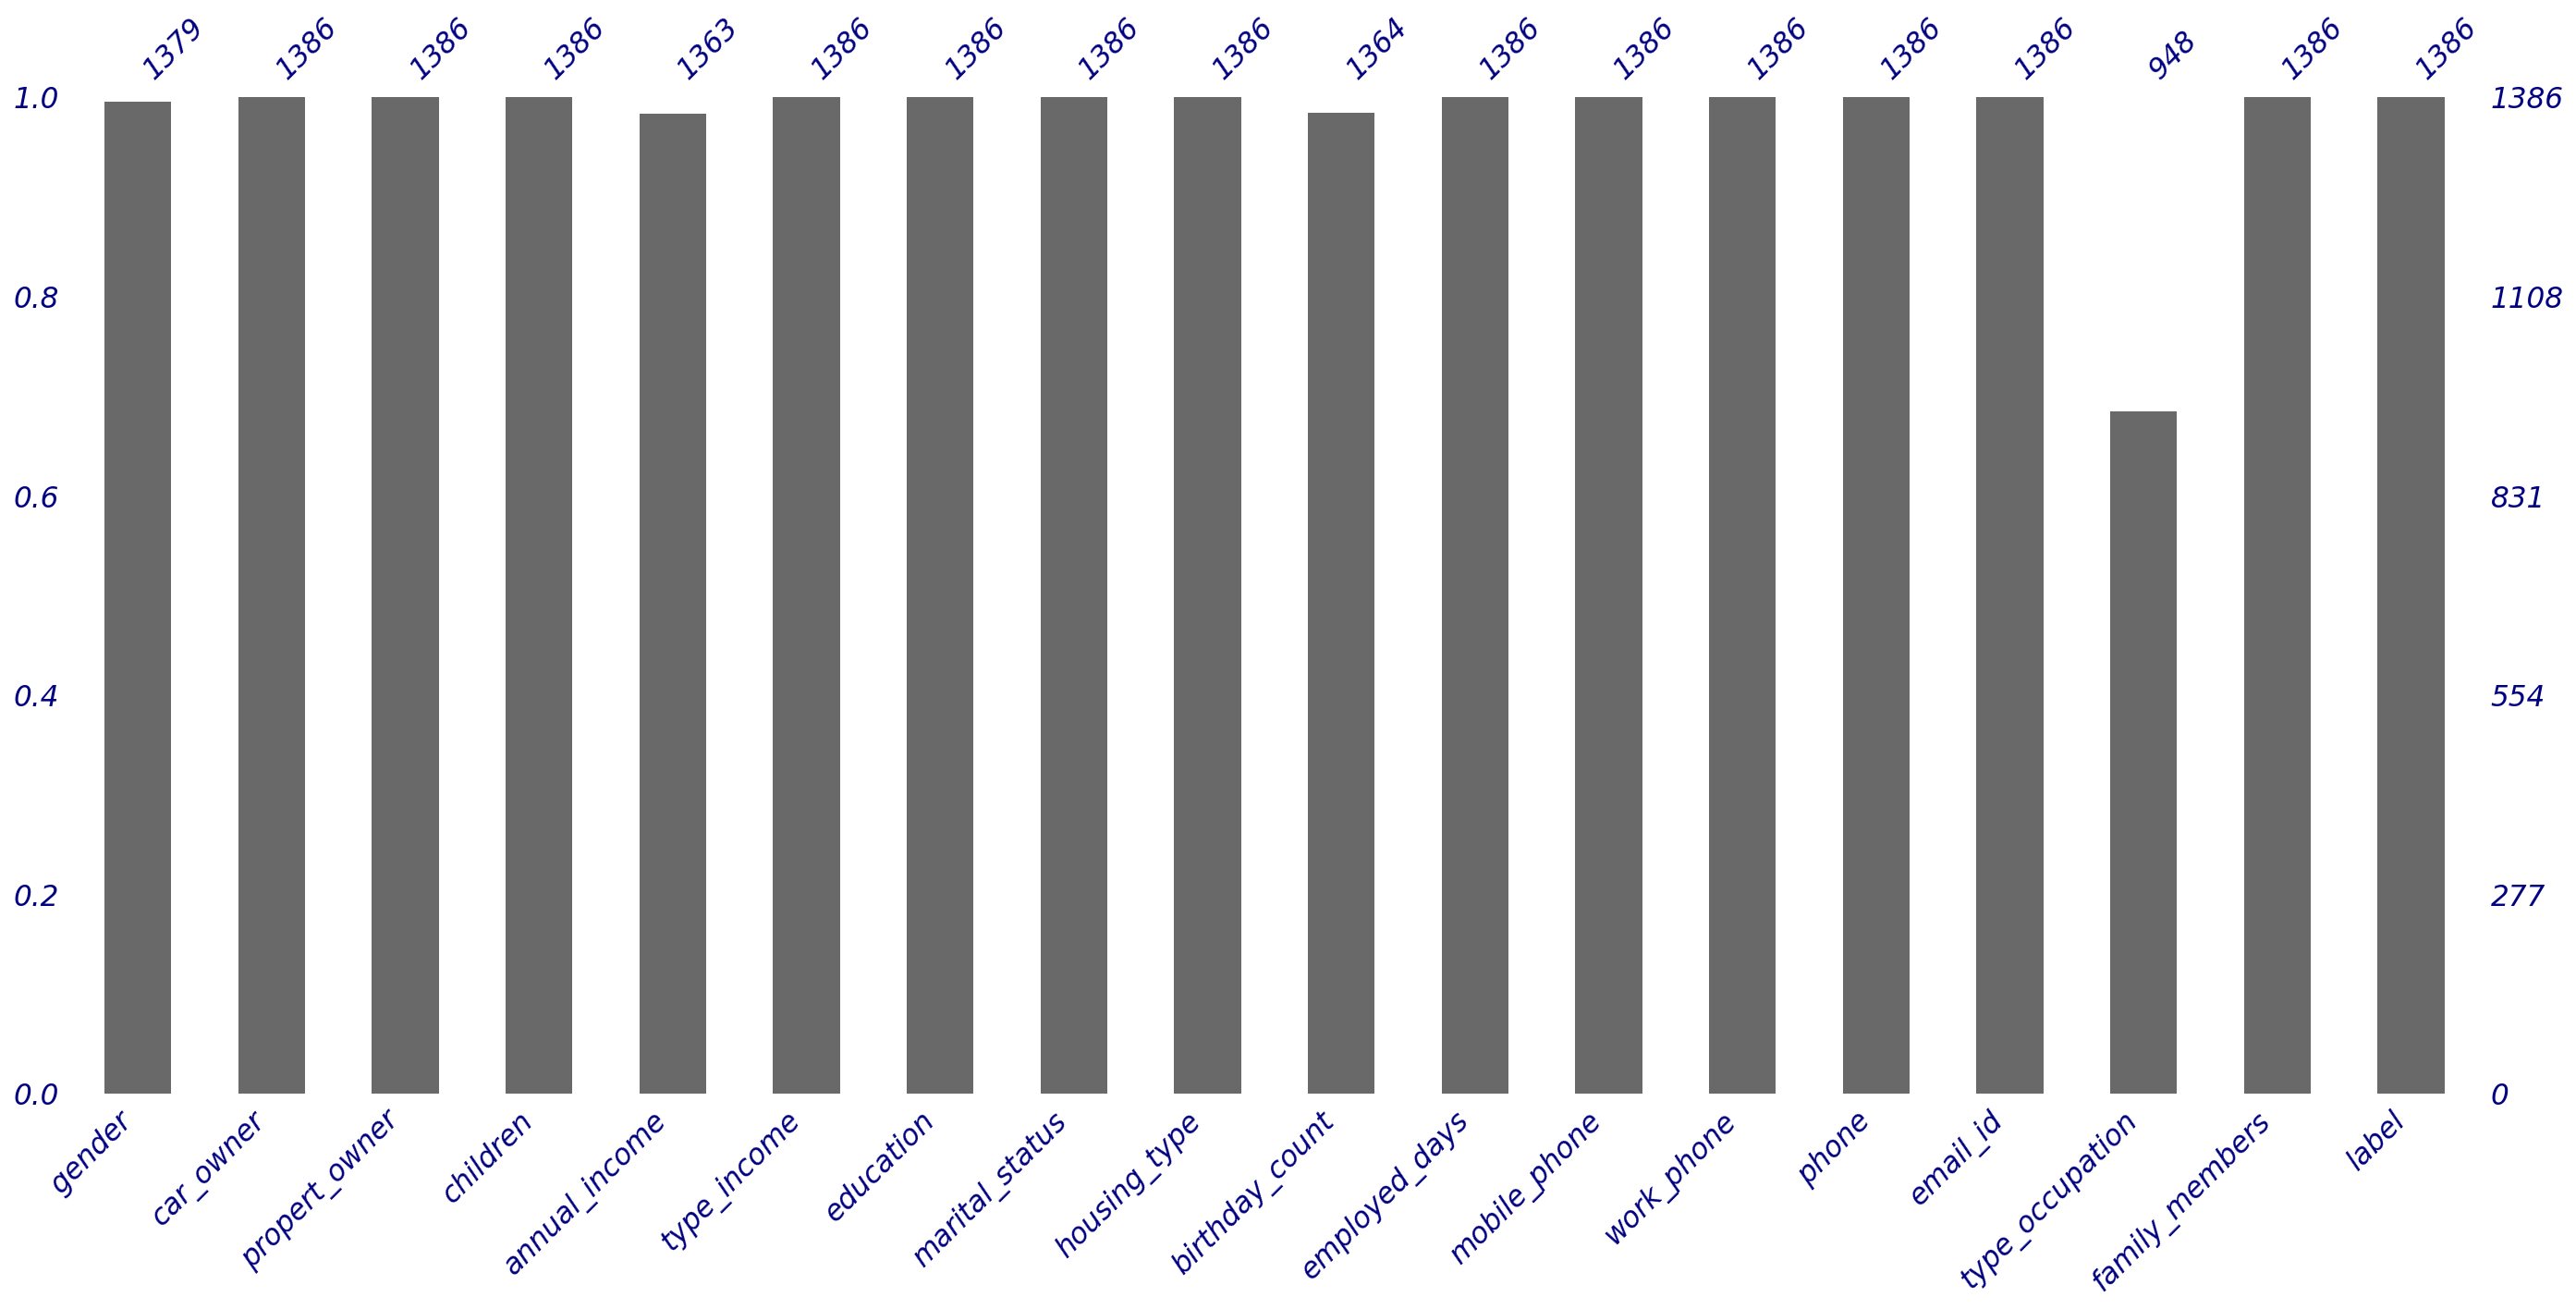

In [19]:
msno.bar(df1) #plotting bar chart to visually identify the missing values.
plt.show() 

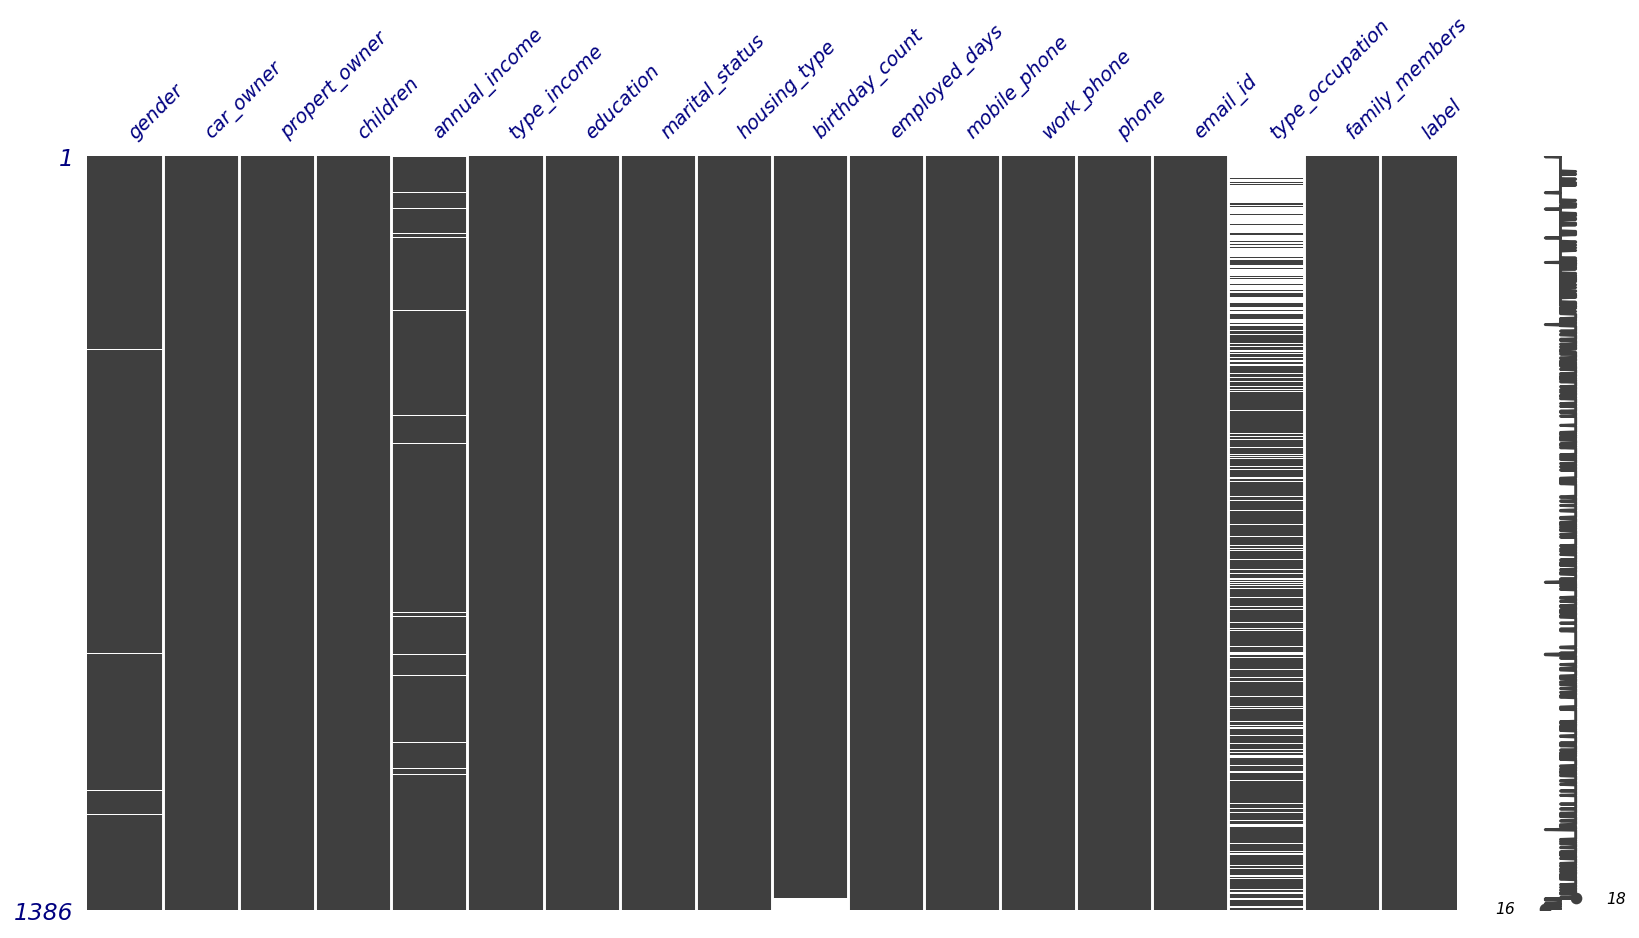

In [20]:
msno.matrix(df1.sort_values('birthday_count'),figsize=(14,7),inline=True,fontsize=10)
plt.show() # verifying the relationships between the columns using msno matrix plot

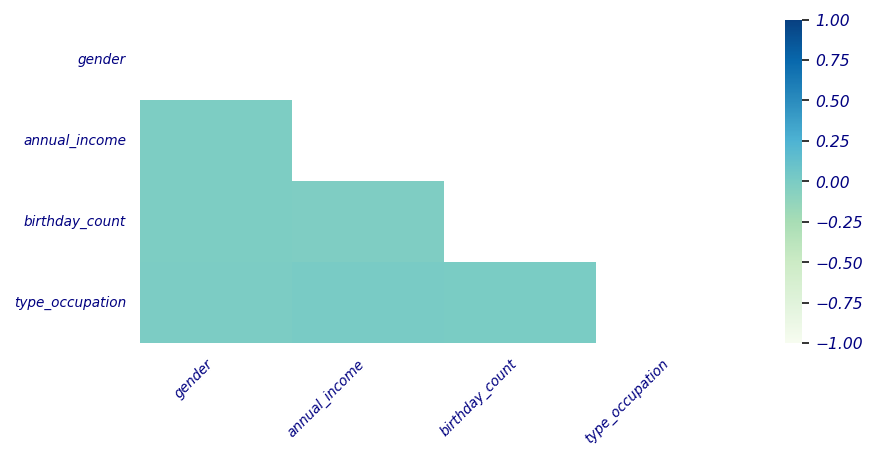

In [21]:
msno.heatmap(df1,figsize=(7,3),cmap='GnBu',fontsize=7)
plt.show() # checking the relationship between missing values in various columns using heatmap

Insights:

    - Gender, Annual Income, Birthday_count and type_occupation columns have missing.
    - Based on the visualization, it is found that type_occupation feature has 1/3 of the Missing values in the total size 
    of the column
    - The heatmap and matrix plots shows the missing values are completely at random and there were no relationship between the missing values

In [22]:
df1.drop(columns=['type_occupation'],inplace=True) #dropping the type_occupation column due to huge # of mssing values.

In [23]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

gender            0.51
car_owner         0.00
propert_owner     0.00
children          0.00
annual_income     1.66
type_income       0.00
education         0.00
marital_status    0.00
housing_type      0.00
birthday_count    1.59
employed_days     0.00
mobile_phone      0.00
work_phone        0.00
phone             0.00
email_id          0.00
family_members    0.00
label             0.00
dtype: float64

In [24]:
df1.dropna(subset=['gender'],inplace=True) # dropping missing records from gender column

In [25]:
print(df1.annual_income.mean())
print(df1.annual_income.median()) # checking the mean and median values of annual_income column

188793.60066371682
157500.0


Inference:
    
 - The Mean value of the annual_income columns is greater than median value **(mean>median)** which means the data is **rightly skewed**

In [26]:
fig=px.box(df1,y='annual_income') #plotting box plot to visualize the outliers in annual income column
fig.update_layout(title=dict(text='Distribution of Annual Income',x=0.5,font_color='navy',font_size=17),
                  yaxis=dict(title='Annual_Income',color='navy'))

In [27]:
median_val=df1.annual_income.median()
df1.annual_income.fillna(median_val,inplace=True) # filling missing values using median value

In [28]:
df1.columns

Index(['gender', 'car_owner', 'propert_owner', 'children', 'annual_income',
       'type_income', 'education', 'marital_status', 'housing_type',
       'birthday_count', 'employed_days', 'mobile_phone', 'work_phone',
       'phone', 'email_id', 'family_members', 'label'],
      dtype='object')

In [29]:
s=SimpleImputer(strategy='median',verbose=2)   #comparing different imputing techniques
knn_impute=KNNImputer(n_neighbors=5,weights=lambda x:x['employed_days'])
mean_imputed=s.fit_transform(df1[['birthday_count']])
knn_imputed=knn_impute.fit_transform(df1[['birthday_count']])
iter_impute=IterativeImputer()
iter_imputed=iter_impute.fit_transform(df1[['birthday_count']])

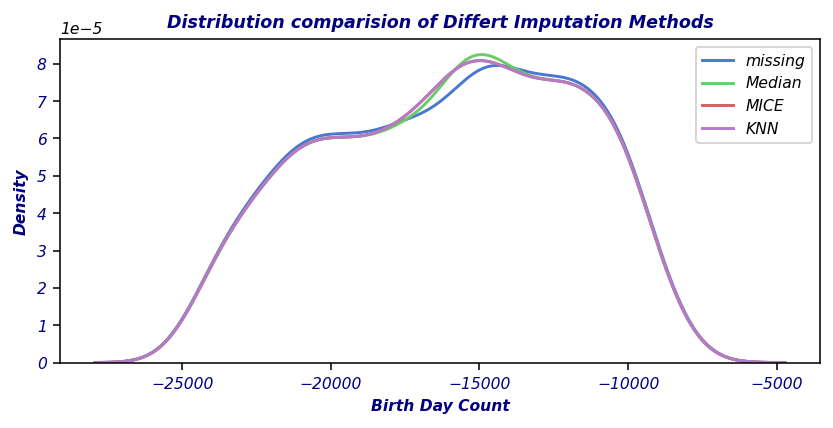

In [30]:
plt.figure(figsize=(7,3))                     #plotting the distribution of data after imputting with multiple imputation methods
sns.kdeplot(df1.birthday_count,label='missing')
# ax[0].axvline(x=df1.birthday_count.mean())
# ax[0].axvline(x=df1.birthday_count.median())
sns.kdeplot(mean_imputed.ravel(),label='Median')
# ax[1].axvline(x=mean_imputed.mean())
# ax[1].axvline(x=np.median(mean_imputed))
sns.kdeplot(iter_imputed.ravel(),label='MICE')
sns.kdeplot(knn_imputed.ravel(),label='KNN')
plt.legend()
plt.title('Distribution comparision of Differt Imputation Methods',size=9,color='navy')
plt.xlabel('Birth Day Count',color='Navy',size=8)
plt.ylabel('Density',color='Navy',size=8)
# ax[2].axvline(x=knn_imputed.mean())
# ax[2].axvline(x=np.median(knn_imputed))
plt.show()

Insights:
    
   - Comparision of Median, MICE and KNN imputed data shows that all the imputation techniques closely resembles the actual data distribution. Hence, I choose KNN method to impute the missing values in the birth day count column

In [31]:
df1['birthday_count']=knn_imputed #imputing the missing values using KNN Method.

In [32]:
df1.to_csv('Credit_Card_Approval_Cleaned.csv')

## <center>Univariate Analysis

In [33]:
cat_columns=[] #creating a list of categorical columns
for col in df1.columns:
    if df1[col].dtype=='object':
        cat_columns.append(col)
cat_columns

['gender',
 'car_owner',
 'propert_owner',
 'type_income',
 'education',
 'marital_status',
 'housing_type']

In [34]:
num_columns=[] # creating a list of numerical columns
for col in df1.columns[:-1]:
    if df1[col].dtype=='int64' or (df1[col].dtype=='float64'):
        num_columns.append(col)
num_columns

['children',
 'annual_income',
 'birthday_count',
 'employed_days',
 'mobile_phone',
 'work_phone',
 'phone',
 'email_id',
 'family_members']

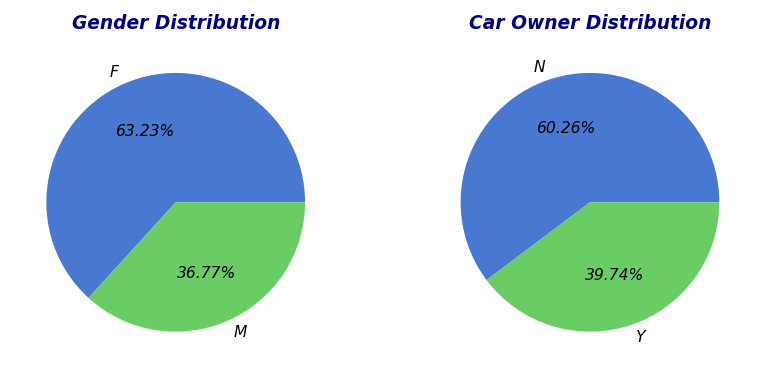

In [35]:
fig,ax=plt.subplots(1,2,figsize=(7,3))

g_pie=df1.gender.value_counts()
ax[0].pie(g_pie,labels=g_pie.index,autopct='%.2f%%')
ax[0].set_title('Gender Distribution')

car_pie=df1.car_owner.value_counts()
ax[1].pie(car_pie,labels=car_pie.index,autopct='%.2f%%')
ax[1].set_title('Car Owner Distribution')

plt.show()

Insights:

   - Based on the visualization of the gender and car owner features the following patterns were identified.
        - People who applied for credit cards are mostly **female (63%) compare to male.**
        - Most applicants **does not own a car (60%)**

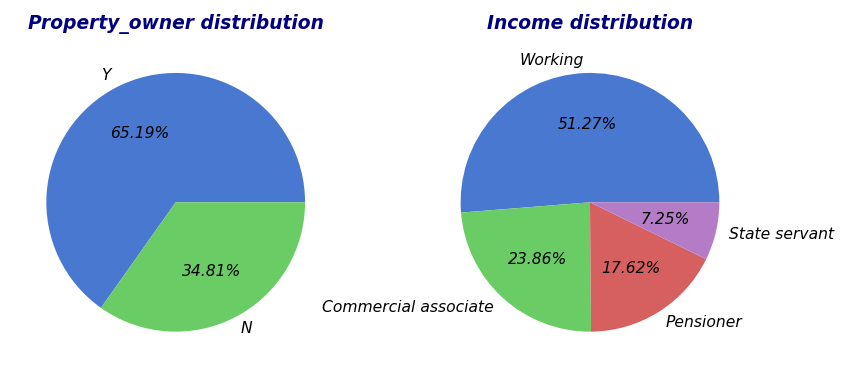

In [36]:
fig,ax=plt.subplots(1,2,figsize=(7,3))
prop_pie=df1.propert_owner.value_counts()
ax[0].pie(prop_pie,labels=prop_pie.index,autopct='%.2f%%')
ax[0].set_title('Property_owner distribution')

income_pie=df1.type_income.value_counts()
ax[1].pie(income_pie,labels=income_pie.index,autopct='%.2f%%')
ax[1].set_title('Income distribution')

plt.show()

Insights:

 - Based on the visualization of the Property Owner and Type_income owner features the following patterns were identified.
     - **Around 65%** of the applicants have their **own property.**
     - **Half of the applicants are working professionals**, followed by 24% of applicants are commercial associates.

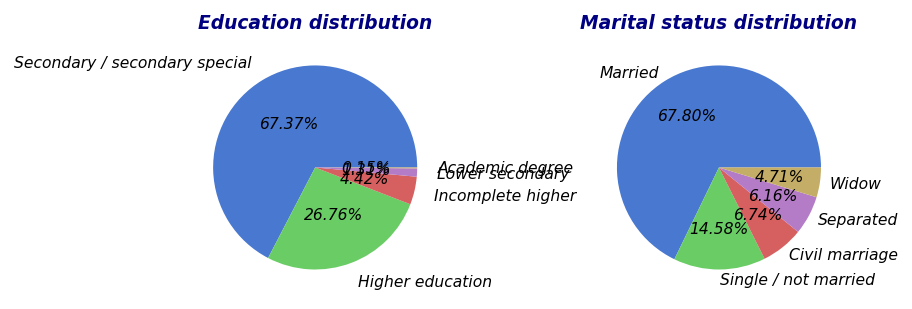

In [37]:
fig,ax=plt.subplots(1,2)
edu_pie=df1.education.value_counts()
ax[0].pie(edu_pie,labels=edu_pie.index,autopct='%.2f%%',pctdistance=0.5,labeldistance=1.2)
ax[0].set_title('Education distribution')

marital_pie=df1.marital_status.value_counts()
ax[1].pie(marital_pie,labels=marital_pie.index,autopct='%.2f%%')
ax[1].set_title('Marital status distribution')

plt.tight_layout()
plt.show()

Insights:
   - Based on the visualization of education and marital status features, following patterns were identified.
        - **Around 67% of applicants** had a **secondary educational background** and 26% of the canditates were completed higher education.
        - **68% of people are married** and 15% people are single.

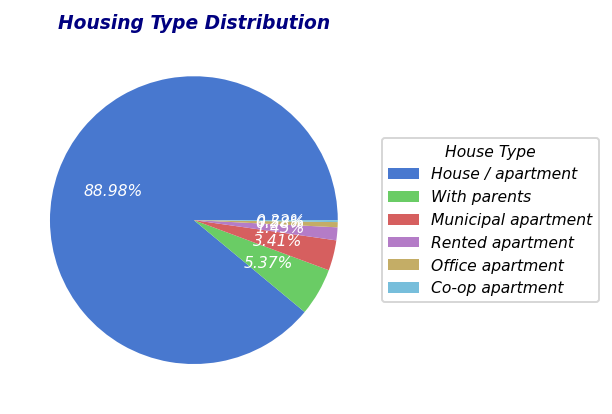

In [38]:
house_pie=df1.housing_type.value_counts()
fig, ax = plt.subplots(figsize=(7, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(house_pie, autopct='%.2f%%',
                                  textprops=dict(color="w"))

ax.legend(wedges, house_pie.index,
          title="House Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Housing Type Distribution')
plt.tight_layout()
plt.show()

Insights:
 - Interestingly, **89% of the applicants** have their **own house/apartment**.

In [39]:
df1['age']=round(-df1.birthday_count/365) # Calculating Age from birthday_count feature.

In [40]:
employment_status=df1.employed_days.apply(lambda x:'Yes' if x<0 else 'No') # extracting employment status from employed_days feature

In [41]:
df1['employment_status']=employment_status

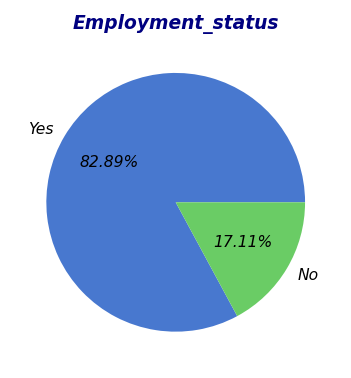

In [42]:
plt.figure(figsize=(7,3))
plt.pie(df1.employment_status.value_counts(),autopct='%.2f%%',labels=df1.employment_status.value_counts().index)
plt.title('Employment_status')
plt.show()

Insights:
   - Based on the visualization of employment status, it was found that around **83% people are working professionals** and **17% of candidates are pensioners.**

In [43]:
df1.columns

Index(['gender', 'car_owner', 'propert_owner', 'children', 'annual_income',
       'type_income', 'education', 'marital_status', 'housing_type',
       'birthday_count', 'employed_days', 'mobile_phone', 'work_phone',
       'phone', 'email_id', 'family_members', 'label', 'age',
       'employment_status'],
      dtype='object')

In [44]:
df1.drop(columns=['birthday_count','employed_days','mobile_phone', 'work_phone','phone', 'email_id'],inplace=True) #dropping unimportant columns

In [45]:
target=df1['label'] # moving the target label to the end of the dataframe
df1.drop(columns=['label'],inplace=True)

In [46]:
df1['target_label']=target

## <center>Outlier Analysis

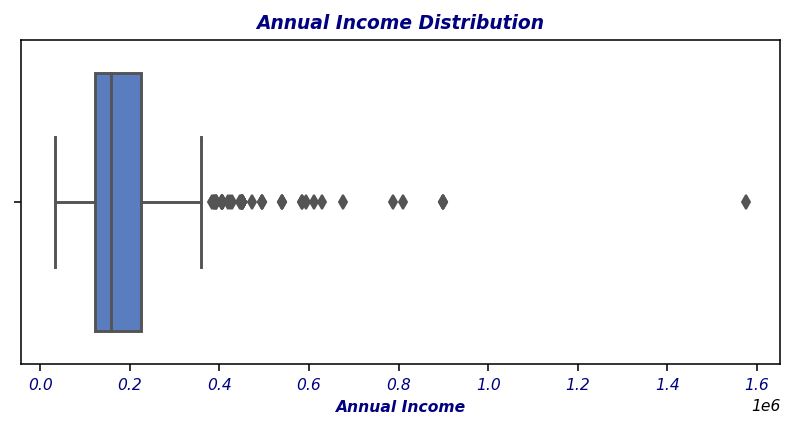

In [47]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df1,x='annual_income')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.show()

Insights:
   - As we have seen earlier, annual income column has some outliers.

In [48]:
Q1=df1['annual_income'].quantile(0.25) # calculating first and third quartile values.
Q3=df1['annual_income'].quantile(0.75)
IQR=Q3-Q1 # calculating IQR
print(f'Q1-Value: {Q1}')
print(f'Q3-Value: {Q3}')
print(f'IQR-Value: {IQR}')
lower_bound = Q1-1.5*IQR #setting upper and lower bound for the feature
upper_bound = Q3+1.5*IQR
print(f'Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}')

Q1-Value: 121500.0
Q3-Value: 225000.0
IQR-Value: 103500.0
Lower Bound: -33750.0
Upper Bound: 380250.0


In [49]:
df1.annual_income.clip(lower=0,upper=upper_bound,inplace=True) # capping the outliers using lower and upper bound values.

In [50]:
(df1.annual_income>380250).sum()/df1.shape[0]*100 #checking for any outliers

0.0

<IPython.core.display.Javascript object>

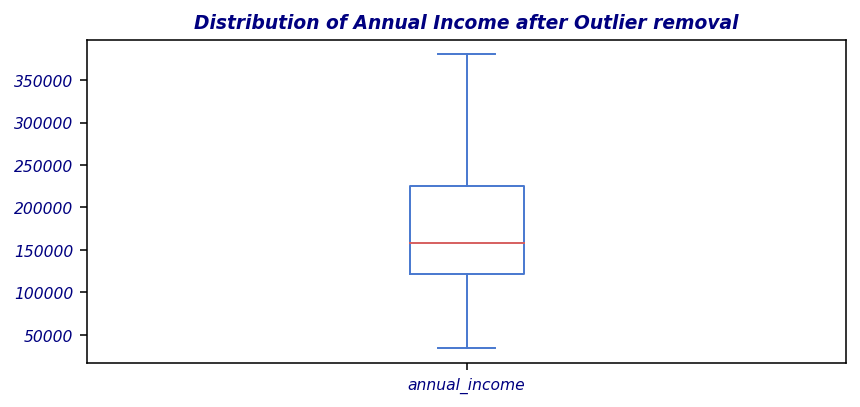

In [51]:
df1.annual_income[np.abs(stats.zscore(df1.annual_income))<=3].plot(kind='box',figsize=(7,3))
plt.title('Distribution of Annual Income after Outlier removal',weight='bold')
plt.show() # visually verifying the outliers after capping

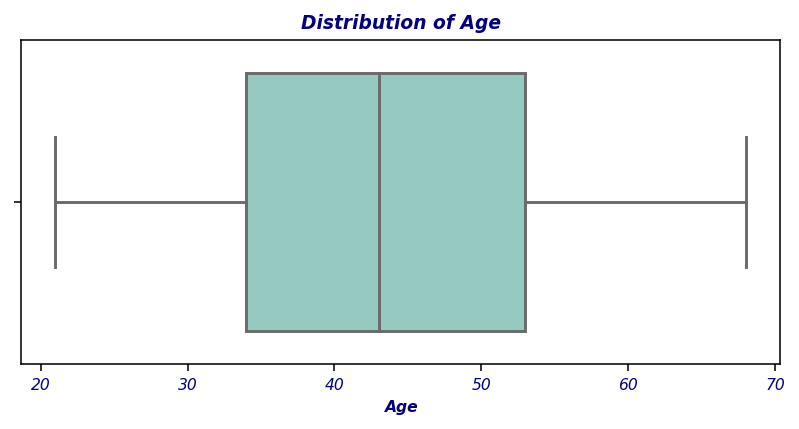

In [52]:
plt.figure(figsize=(7,3))
fig=sns.boxplot(data=df1,x='age',palette="Set3")
fig.set_title('Distribution of Age',weight='bold')
fig.set_xlabel('Age')
plt.show()

Insights:
   - Distribution of Age has no outliers and data is normally distributed.

## <center>Bivariate Analysis

In [53]:
g=df1.groupby('gender')[['target_label']].value_counts()

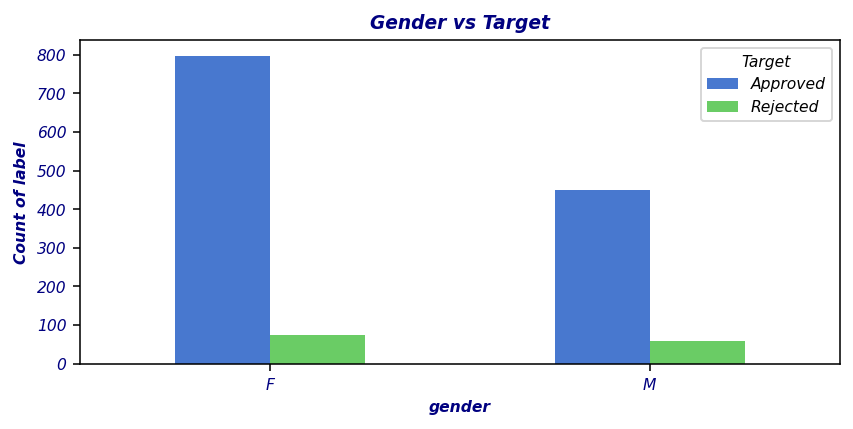

In [54]:
g.unstack(level=1).plot(kind='bar',rot=0,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'])
plt.title('Gender vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
   - Upon analysis of the relationship between gender and target column, it was found that
       - Applications of Female candidates had been approved in high numbers compared to the male candidates.

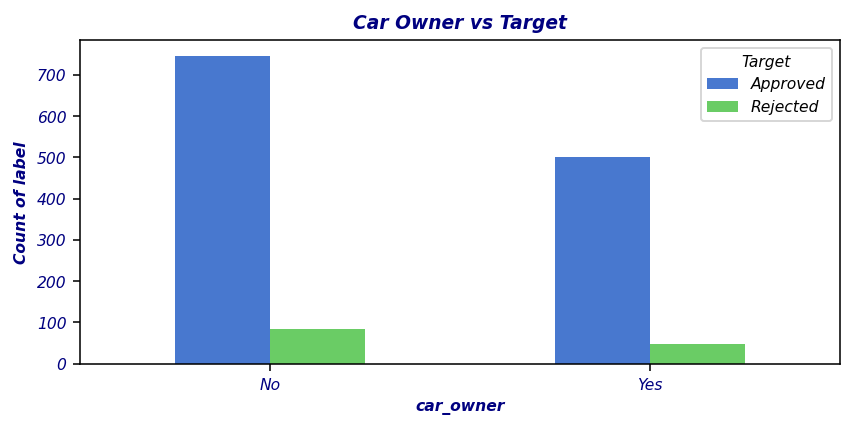

In [55]:
c=df1.groupby('car_owner')[['target_label']].value_counts()
c.unstack(level=1).plot(kind='bar',rot=0,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'])
plt.xticks([0,1],['No','Yes'])
plt.title('Car Owner vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
   - Applicantions of candidates who does not have a car were approved in large numbered to a person who owns a car.

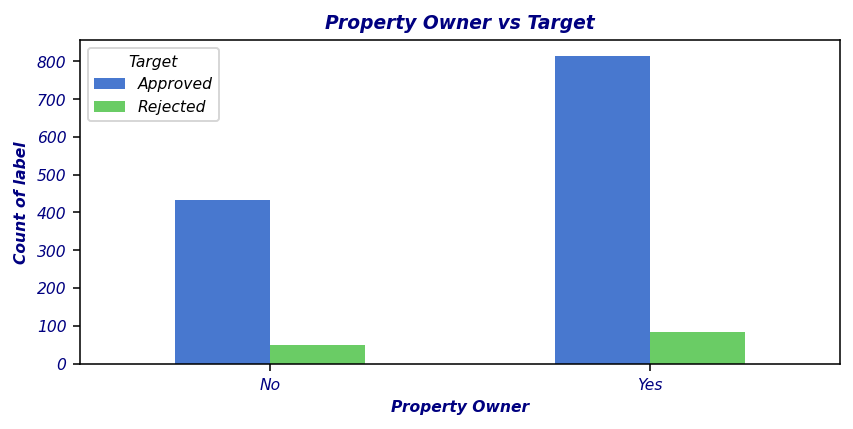

In [56]:
p=df1.groupby('propert_owner')[['target_label']].value_counts()
p.unstack(level=1).plot(kind='bar',rot=0,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper left')
plt.xticks([0,1],['No','Yes'])
plt.title('Property Owner vs Target')
plt.xlabel('Property Owner')
plt.ylabel('Count of label')
plt.show()

Insights:
   - Applicants who are having their own property has higher change of getting credit cards. 

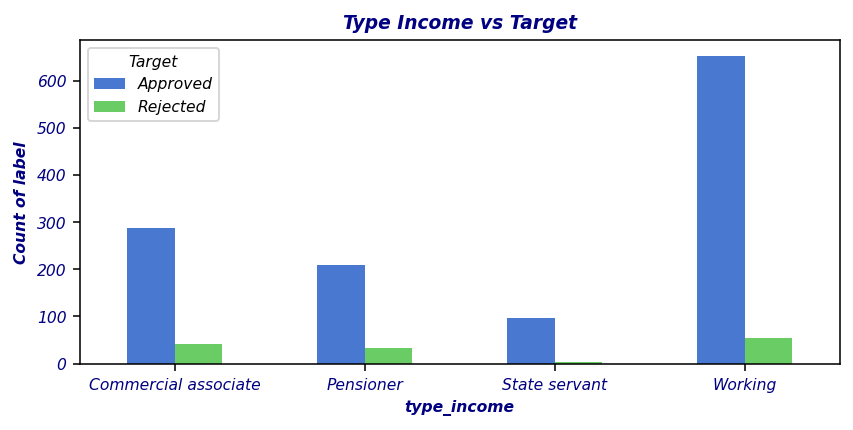

In [57]:
t=df1.groupby('type_income')[['target_label']].value_counts()
t.unstack(level=1).plot(kind='bar',rot=0,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper left')
plt.title('Type Income vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
   - Applicants who are working and commercial associates had higher percentage of credit card approval.

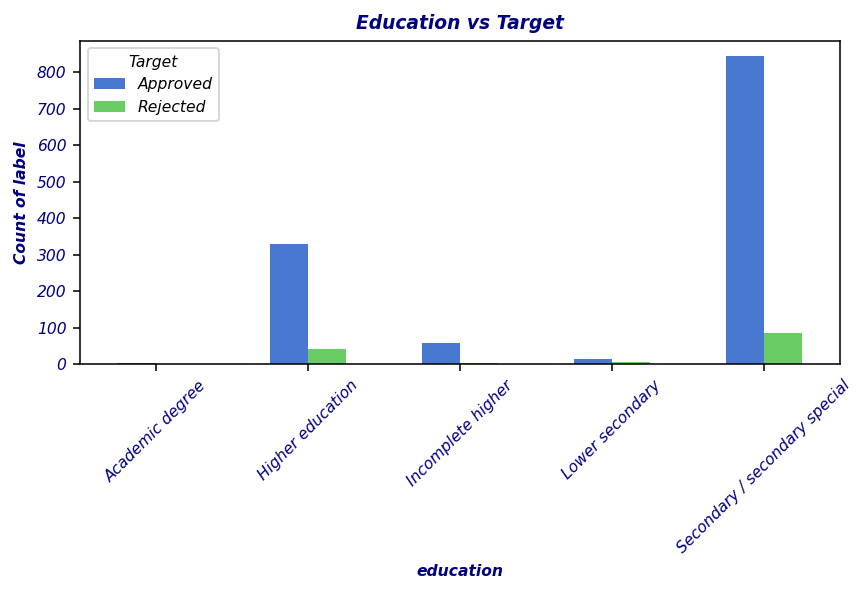

In [58]:
e=df1.groupby('education')[['target_label']].value_counts()
e.unstack(level=1).plot(kind='bar',rot=45,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper left')
plt.title('Education vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
   - Applicants who have education qualification of secondary and higher education had higher change of getting the credit card.

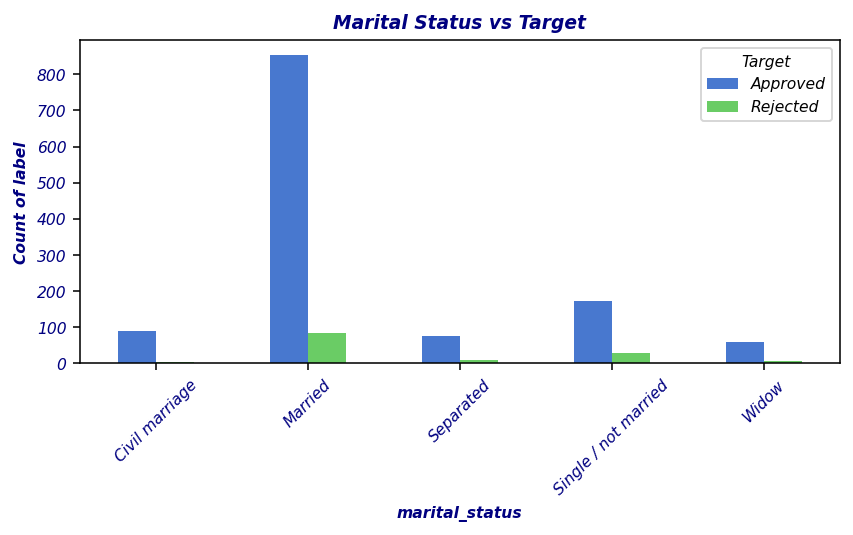

In [59]:
m=df1.groupby('marital_status')[['target_label']].value_counts()
m.unstack(level=1).plot(kind='bar',rot=45,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper right')
plt.title('Marital Status vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
   - Married people has higher percentage of approval rate compared to the rest of the groups.

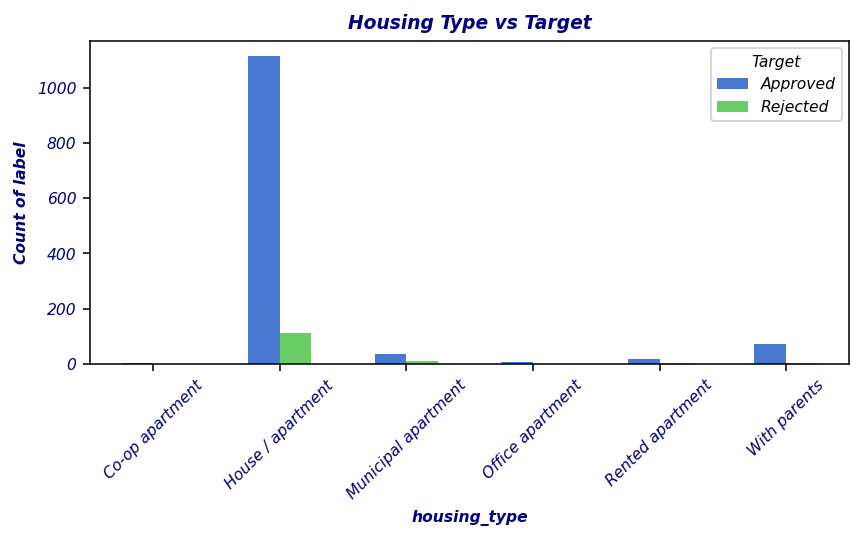

In [60]:
h=df1.groupby('housing_type')[['target_label']].value_counts()
h.unstack(level=1).plot(kind='bar',rot=45,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper right')
plt.title('Housing Type vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
   - People who own a House/Apartment has higher change of getting credit cards.

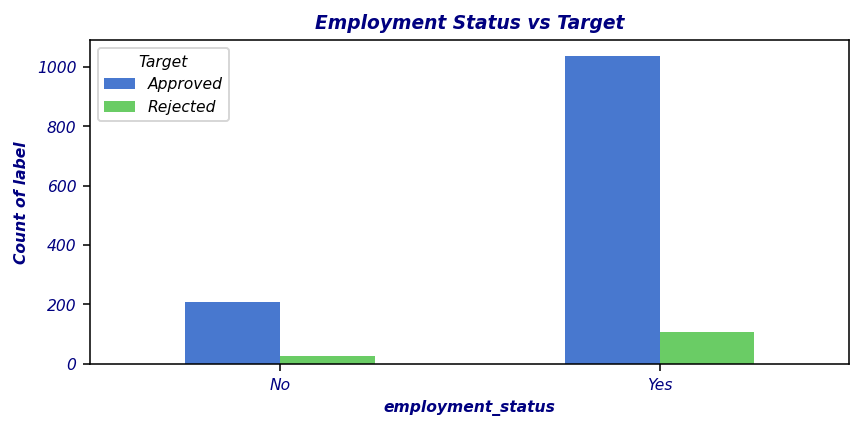

In [61]:
es=df1.groupby('employment_status')[['target_label']].value_counts()
es.unstack(level=1).plot(kind='bar',rot=0,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper left')
plt.title('Employment Status vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
    - Applicants who are employed has a higher percent of credit card approval.

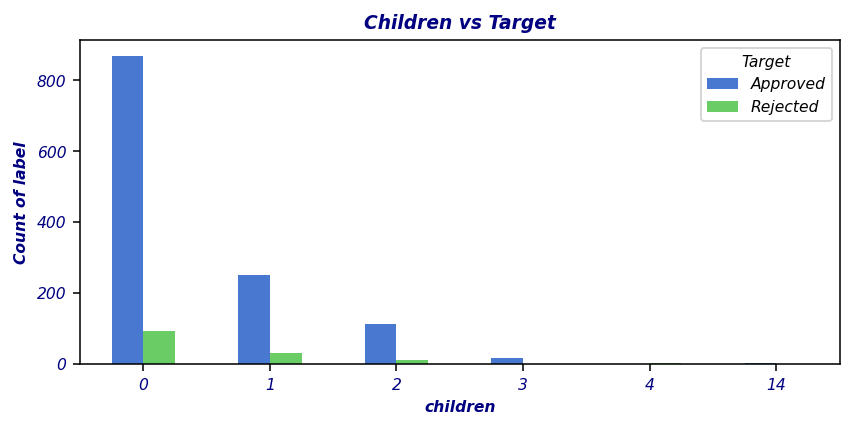

In [62]:
ch=df1.groupby('children')[['target_label']].value_counts()
ch.unstack(level=1).plot(kind='bar',rot=0,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper right')
plt.title('Children vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
   - Applicants who don't have child and having a single child have greater change of getting credit cards.

In [63]:
df1.query('children>4')

gender car_owner propert_owner  children  annual_income type_income  \
Ind_ID                                                                        
5061207      M         Y             Y        14       225000.0     Working   

                             education marital_status       housing_type  \
Ind_ID                                                                     
5061207  Secondary / secondary special      Separated  House / apartment   

         family_members   age employment_status  target_label  
Ind_ID                                                         
5061207              15  49.0               Yes             0

In [64]:
df1.drop(index=df1.query('children>4').index,inplace=True)

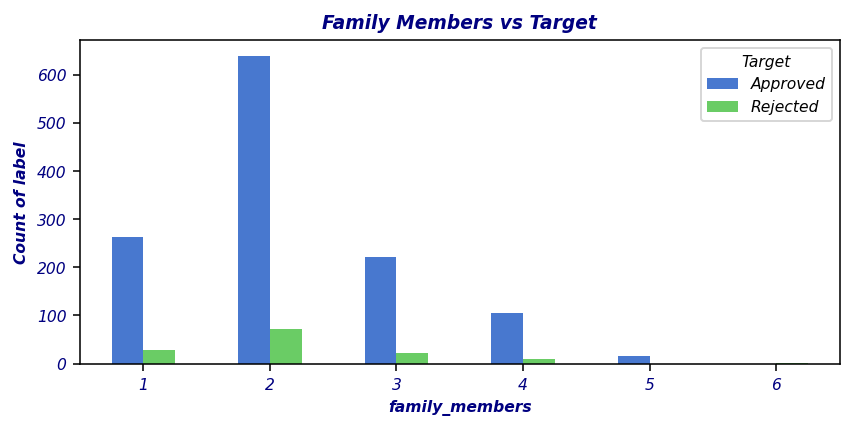

In [65]:
fm=df1.groupby('family_members')[['target_label']].value_counts()
fm.unstack(level=1).plot(kind='bar',rot=0,figsize=(7,3))
plt.legend(title='Target',labels=['Approved','Rejected'],loc='upper right')
plt.title('Family Members vs Target')
plt.ylabel('Count of label')
plt.show()

Insights:
 - Applicant who doesn't have another family member or family with 2 member has better approval rate compared to the rest of the groups.

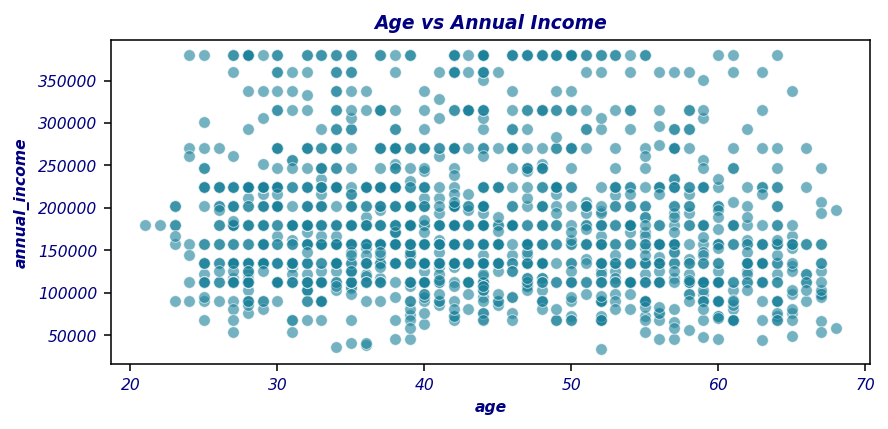

In [66]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df1,x='age',y='annual_income',alpha=0.6,facecolor=[0.1,0.5,0.6])
plt.title('Age vs Annual Income')
plt.show()

Insights:
   - Based on the visualization of age vs annual income features, no relationship between these two features identified.

In [67]:
lbl=LabelEncoder() #Encoding the categorical columns with label encoder and Ordinal Encoder.
for col in ['gender','car_owner','propert_owner','employment_status','type_income','marital_status','housing_type']:
    df1[col]=lbl.fit_transform(df1[col])

In [68]:
oe=OrdinalEncoder(categories=[['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']])

In [69]:
df1['education']=oe.fit_transform(df1[['education']])

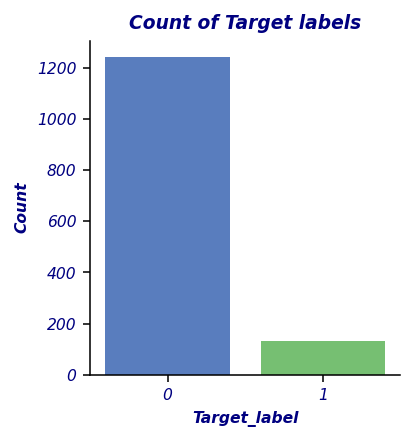

In [70]:
sns.catplot(data=df1,x='target_label',kind='count',height=3,aspect=1,ax=ax)
plt.title('Count of Target labels')
plt.xlabel('Target_label',size=8)
plt.ylabel('Count',size=8)
plt.show()

Inference:
   - Upon visualization of the target variable, it was found that target column has imbalanced number of labels.
   - In order to get the better evaluation of the labels, dataset need to be balanced.

In [71]:
# X=df1.drop('target_label',axis=1)
# y=df1['target_label']

In [72]:
# from sklearn.feature_selection import SequentialFeatureSelector,mutual_info_classif
# sfs=SequentialFeatureSelector(knn,n_features_to_select=5,n_jobs=-1)
# sfs.fit(X,y)
# sfs.get_support()

In [73]:
# np.array(df1.columns[:-1])*sfs.get_support()

In [74]:
# importance=mutual_info_classif(X,y)
# print(importance)
# features=pd.Series(importance,df1.columns[0:len(df1.columns)-1])
# features.plot(kind='barh')
# plt.title('Feature vs Importance')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

In [75]:
df1.columns

Index(['gender', 'car_owner', 'propert_owner', 'children', 'annual_income',
       'type_income', 'education', 'marital_status', 'housing_type',
       'family_members', 'age', 'employment_status', 'target_label'],
      dtype='object')

In [76]:
X=df1.drop(columns=['target_label']) #setting feature and target variables
y=df1['target_label']

In [77]:
#balancing the dataset using SMOTE method
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y)

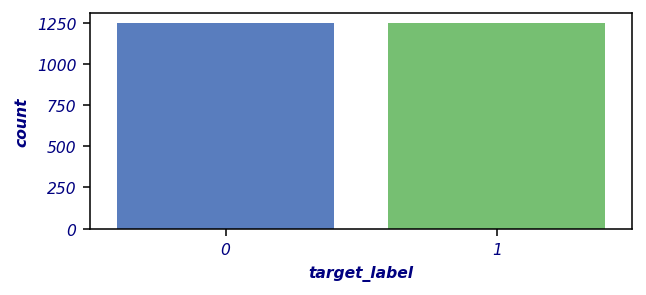

In [78]:
fig,ax=plt.subplots(1,1,figsize=(5,2)) #visualizing the target column after balancing the dataset
sns.countplot(y,ax=ax)
plt.show()

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [80]:
st=StandardScaler()
x_train=st.fit_transform(x_train)

In [81]:
x_test=st.fit_transform(x_test)

In [82]:
def hyper_tuning(estim,params):
    cv=GridSearchCV(estim,param_grid=params,refit=True,verbose=3,scoring='f1') # created a function for hyper parameter tuning
    cv.fit(X,y)
    return cv.best_estimator_,cv.best_params_

# <center><font color='green'>Model 1 - KNN Classifier

In [83]:
knn=KNeighborsClassifier(leaf_size=8, n_neighbors=1, p=1)

In [84]:
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# <center><font color='green'>Model 2 - Decision Tree Classifier

In [85]:
dt=DecisionTreeClassifier(max_depth=6)

In [86]:
# params={'max_depth':[2,3,4,5,6]}

# <center><font color='green'>Model 3 - Random Forest Classifier

In [87]:
rfc=RandomForestClassifier(max_depth=2, n_estimators=10)

In [88]:
# params={'n_estimators':[10,50,100,150,200],'max_depth':[2,3,4,5,6]}
# hyper_tuning(rfc,params)

# <center><font color='green'>Model 4 - AdaBoost Classifier

In [89]:
abc=AdaBoostClassifier(learning_rate=0.01, n_estimators=10)

In [90]:
# params={'n_estimators':[10,50,100,150,200],'learning_rate':[0.01,0.05,0.1,0.3]}

# <center><font color='green'>Model 5 - XGBoost Classifier

In [91]:
xgb=XGBClassifier(learning_rate= 0.05, max_depth= 2, n_estimators=10)

In [92]:
# params = {'n_estimators':[10,50,100,200],
#     'max_depth': [2,3,4,5,6], 
#               'learning_rate': [0.05,0.1,0.5,1]}

# <center><font color='green'>Model 6 - LightGBM Classifier

In [93]:
lgb=LGBMClassifier(importance_type='gain', learning_rate=0.05, max_depth=2,
               n_estimators=10)

In [94]:
# params = {'n_estimators':[10,50,100,200],
#     'max_depth': [2,3,4,5,6], 
#               'learning_rate': [0.05,0.1,0.5,1]}

# <center><font color='green'>Model 7 - SVM Classifier

In [95]:
svc=SVC(C=10, class_weight='balanced', gamma=0.01)
svc.fit(x_train,y_train)

SVC(C=10, class_weight='balanced', gamma=0.01)

In [96]:
# params={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# <center><font color='green'> Performance Evaluation

In [97]:
model={'KNN':knn,'DecisionTree':dt,'RandomForest':rfc,'AdaBoost':abc,'XGBoost':xgb,'Lightgbm':lgb,'SVM':svc}
performance_test={}
performance_train={}
cv_score={}
for mname,val in model.items():
    print(f'\033[1m{mname} Model:\033[0m')
    print('-'*90)
    val.fit(x_train,y_train)
    y_pred_test=val.predict(x_test)
    y_pred_train=val.predict(x_train)
    print(f'\033[1mTrain Data:\t\t\t\tTest Data\033[00m')
    print('-'*90)
    print(f'Accuracy: {round(met.accuracy_score(y_train,y_pred_train),2)}\t\t\t\tAccuracy: {round(met.accuracy_score(y_test,y_pred_test),2)}\033[0m')
    print(f'Precision: {round(met.precision_score(y_train,y_pred_train),2)}\t\t\t\tPrecision: {round(met.precision_score(y_test,y_pred_test),2)}')
    print(f'Recall: {round(met.recall_score(y_train,y_pred_train),2)}\t\t\t\tRecall: {round(met.recall_score(y_test,y_pred_test),2)}')
    print(f'F1-Score: {round(met.f1_score(y_train,y_pred_train),2)}\t\t\t\tF1-Score: {round(met.f1_score(y_test,y_pred_test),2)}')
    print('='*90)
    print()
    score_f1_test=met.f1_score(y_test,y_pred_test)
#     score_prec_test=met.precision_score(y_test,y_pred_test)
#     score_recall_test=met.recall_score(y_test,y_pred_test)
    
    score_f1_train=met.f1_score(y_train,y_pred_train)
    cvs=cross_val_score(val,X,y,cv=10,scoring='f1')
    performance_train[mname]=score_f1_train
    performance_test[mname]=score_f1_test
    cv_score[mname]=cvs.mean()*100

KNN Model:
------------------------------------------------------------------------------------------
Train Data:				Test Data
------------------------------------------------------------------------------------------
Accuracy: 0.99				Accuracy: 0.84
Precision: 1.0				Precision: 0.8
Recall: 0.99				Recall: 0.9
F1-Score: 0.99				F1-Score: 0.85

DecisionTree Model:
------------------------------------------------------------------------------------------
Train Data:				Test Data
------------------------------------------------------------------------------------------
Accuracy: 0.8				Accuracy: 0.76
Precision: 0.79				Precision: 0.76
Recall: 0.82				Recall: 0.77
F1-Score: 0.8				F1-Score: 0.77

RandomForest Model:
------------------------------------------------------------------------------------------
Train Data:				Test Data
------------------------------------------------------------------------------------------
Accuracy: 0.71				Accuracy: 0.64
Precision: 0.71				Precision: 0.62
Rec

In [98]:
score_df=pd.DataFrame(performance_train,index=['f1_score']).T # Comparing the F1-Score for train data of different models
score_df=score_df.apply(lambda x:round(x*100,2))

f=px.bar(score_df,text_auto=True,color_discrete_sequence =['#11aaaa']*3)
f.update_traces(textposition='outside',texttemplate='%{y:.2f}%',showlegend=False,marker=dict(line=dict(color='palegreen', width=3)))
f.update_layout(paper_bgcolor='white',plot_bgcolor='white',title_x=0.5,title_text='<b>F1-Score Train Data',
                xaxis=dict(title='<b>Model_Name',linecolor='black'),yaxis=dict(title='<b>Score',linecolor='black'))

In [99]:
score_df=pd.DataFrame(performance_test,index=['f1_score']).T # Comparing the F1-Score for test data of different models
score_df=score_df.apply(lambda x:round(x*100,2))

f=px.bar(score_df,text_auto=True,color_discrete_sequence =['#11aaaa']*3)
f.update_traces(textposition='outside',texttemplate='%{y:.2f}%',showlegend=False,marker=dict(line=dict(color='palegreen', width=2)))
f.update_layout(paper_bgcolor='white',plot_bgcolor='white',title_x=0.5,title_text='<b>F1-Score Test Data',
                xaxis=dict(title='<b>Model_Name',linecolor='black'),yaxis=dict(title='<b>Score',linecolor='black'))

Inference:
 - Upon comparision of the F1-Score, Precision & Recall Score for multiple models with Test and Train Data, it was found that **KNN and Decision Tree and SVM models** did **performed well with the prediction of the target.**

In [100]:
score_cv=pd.DataFrame(cv_score.values(),index=cv_score.keys(),columns=['score'])
f=px.bar(score_cv,text_auto=True,width=1000,color_discrete_sequence =['#11aaaa']*3)
f.update_traces(textposition='outside',texttemplate='%{y:.2f}%',showlegend=False,marker=dict(line=dict(color='palegreen', width=2)))
f.update_layout(paper_bgcolor='white',plot_bgcolor='white',title_x=0.5,title_text='<b>Cross Validation Score',
                xaxis=dict(title='<b>Model_Name',linecolor='black'),yaxis=dict(title='<b>Score',linecolor='black'))

Inference:
   - Calculation of cross validation score for various models depicts that **performance of KNN and SVM were better** compared with other models with average accuracy of 85% and 86% respectively.

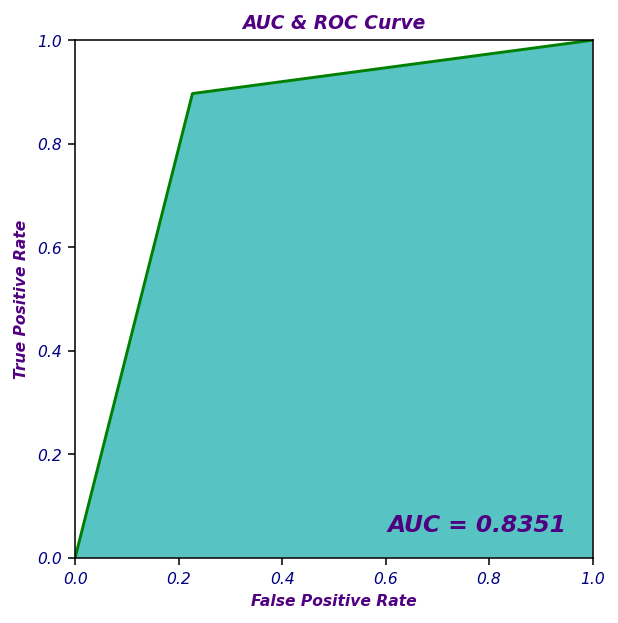

In [113]:
auc = met.roc_auc_score(y_test, knn.predict(x_test)) #plotting the AUC & ROC curve for KNN and SVM Model
auc

false_positive_rate, true_positive_rate, thresolds = met.roc_curve(y_test, knn.predict(x_test))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve",color='#500181')
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='#11aaaa', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='#500181')
plt.xlabel("False Positive Rate",color='#500181')
plt.ylabel("True Positive Rate",color='#500181')
plt.show()

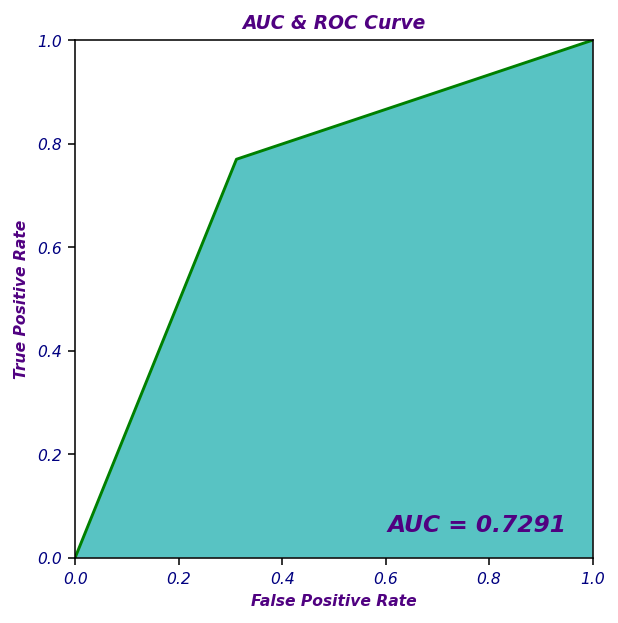

In [102]:
auc = met.roc_auc_score(y_test, svc.predict(x_test)) #plotting the AUC & ROC curve for KNN and SVM Model
auc

false_positive_rate, true_positive_rate, thresolds = met.roc_curve(y_test, svc.predict(x_test))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve",color='#500181')
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='#11aaaa', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='#500181')
plt.xlabel("False Positive Rate",color='#500181')
plt.ylabel("True Positive Rate",color='#500181')
plt.show()

In [103]:
# Final Model

In [104]:
eclf1 = VotingClassifier(estimators=[('knn', knn), ('dt', dt), ('svc', svc)], voting='hard') 
'''Created a model using the combination of well performed 
three models (KNN,Decision Tree, SVM)'''

'Created a model using the combination of well performed \nthree models (KNN,Decision Tree, SVM)'

In [105]:
eclf1.fit(x_train,y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(leaf_size=8, n_neighbors=1,
                                                   p=1)),
                             ('dt', DecisionTreeClassifier(max_depth=6)),
                             ('svc',
                              SVC(C=10, class_weight='balanced', gamma=0.01))])

In [106]:
y_pred=eclf1.predict(x_test)
pred_train=eclf1.predict(x_train)

In [107]:
print('f1_score_train: Voting Classifier: ',round(met.f1_score(y_train,pred_train)*100,2),'%')

f1_score_train: Voting Classifier:  89.22 %


In [108]:
met.f1_score(y_test,y_pred)
print('f1_score_test: Voting Classifier: ',round(met.f1_score(y_test,y_pred)*100,2),'%')

f1_score_test: Voting Classifier:  83.4 %


In [109]:
cvs=cross_val_score(eclf1,X,y,cv=10)

In [110]:
print('cross_val_score: Voting Classifier: ',round(cvs.mean()*100,2),'%')

cross_val_score: Voting Classifier:  88.05 %


**Summary:**
   - I have imported the necessary modules for the project and check the outline of the data.
   - I did preprocessing steps to **remove the outliers and treat the missing values.**
   - I did exploratory analysis to **visualize the distribution of the different features and to identify the relationship between multiple features.**
   - I used feature engineering techniques like **Label and Ordinal Encoding,Standard Scaler to normalize the data**, and created two **new features Age and Employment status from the existing features.**
   - I used **SMOTE method** to treat the **imbalance nature of the dataset.**
   - I have used ***7 models (KNN, Decision Tree, Random Forest, AdaBoost, XGBoost, LightGBM and SVM)*** for this project.
   - Evaluated the performance of the various models using **Accuracy, Precision, Recall and F1-Score.**
   - Based on the Performance Evaluation, it was found that **KNN, Decision Tree and SVM model did well in predicting the target label.**
   - Finally, I created a **Voting classifier with the combination of the three models to accumulate the accuracies** of those models.
   - I get an **average validation score of 88%** using the Voting Classifier.
   - Based on the activities I have performed, I am concluding that **SVM is the best for predicting (Accuracy - 86.40%) the credit card data as an individual model.** Overall, **Voting Classifier with combination of KNN, Decision Tree and SVM** is **best for predicting the Credit Card Approval Data (Accuracy - 88.05%).**

# <center><font color='green'>SQL Queries

- Query 1: Group the customers based on their income type and find the average of their annual income.

**select type_income,round(avg(annual_income),2) Average_Income from credit_card_approval_cleaned group by type_income;**

- Query 2: Find the female owners of cars and property.

**select Ind_Id from credit_card_approval_cleaned where gender='F' and car_owner='Y' and propert_owner='Y';**

- Query 3: Find the male customers who are staying with their families.

**select Ind_ID, gender, marital_status,family_members from credit_card_approval_cleaned where gender='M' and family_members>1;**

- Query 4: Please list the top five people having the highest income.

**select Ind_ID,annual_income,rnk from (select *,dense_rank() over(order by annual_income desc) rnk from credit_card_approval_cleaned) x
where x.rnk<=5;**

**select Ind_ID,annual_income,rnk from (select *,row_number() over(order by annual_income desc) rnk from credit_card_approval_cleaned) x
where x.rnk<=5;**

- Query 5: How many married people are having bad credit?

**select count(Ind_ID) people_count from credit_card_approval_cleaned where marital_status in ('Married','Civil marriage') and label=1;**

- Query 6: What is the highest education level and what is the total count?

**select education,count(*) total from credit_card_approval_cleaned where education='Academic degree';**

**select education,count(*) total from credit_card_approval_cleaned group by education order by total desc limit 1;**

- Query 7: Between married males and females, who is having more bad credit?

**select gender,count(*) total from credit_card_approval_cleaned where label=1 group by gender order by total desc limit 1;**

# <center><font color='green'> ---Thank You---